<a href="https://colab.research.google.com/github/davidheram/K-means/blob/main/K_means_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


In [151]:
df = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=809&path=housing.csv")

In [152]:
X = df[["Latitude","Longitude","MedInc"]]

In [153]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [154]:
X_scaled

array([[ 1.05254828, -1.32783522,  2.34476576],
       [ 1.04318455, -1.32284391,  2.33223796],
       [ 1.03850269, -1.33282653,  1.7826994 ],
       ...,
       [ 1.77823747, -0.8237132 , -1.14259331],
       [ 1.77823747, -0.87362627, -1.05458292],
       [ 1.75014627, -0.83369581, -0.78012947]])

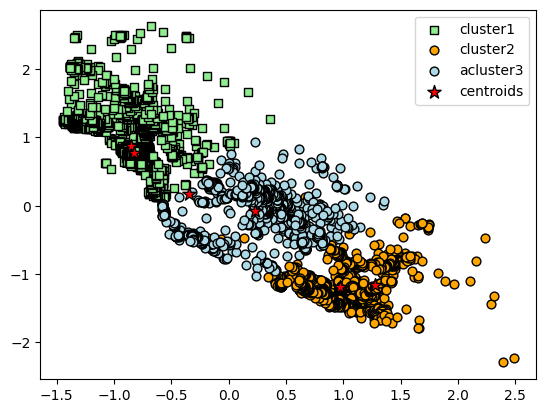

In [155]:
km = KMeans(n_clusters=6, init="random",max_iter=300,tol=1e-04, random_state=0)
y_km = km.fit_predict(X_scaled)

plt.scatter(X_scaled[y_km==0,0], X_scaled[y_km==0,1], s=40, c='lightgreen', marker='s', edgecolors='black', label = 'cluster1')
plt.scatter(X_scaled[y_km==1,0], X_scaled[y_km==1,1], s=40, c='orange', marker='o', edgecolor='black', label='cluster2')
plt.scatter(X_scaled[y_km==2,0], X_scaled[y_km==2,1], s=40, c='lightblue', marker='o', edgecolor='black', label='acluster3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)

In [156]:
df["cluster"] = y_km
df["cluster"] = df["cluster"].astype("category")

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X_scaled, test_size=0.3,random_state=42)

y_test_km = km.predict(X_test)

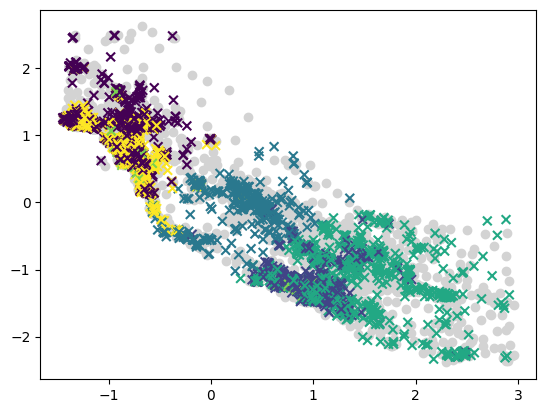

In [158]:
plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c="lightgray",
    label="Train")

plt.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=y_test_km,
    s=40,
    marker="x",
    label="Test")

In [159]:
km.inertia_

10038.51575694834

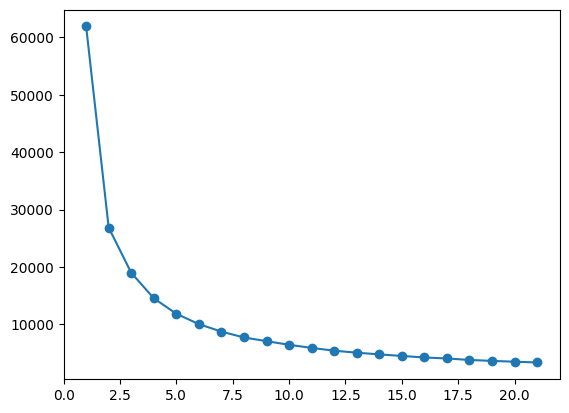

In [161]:
distortions = []
for i in range(1,22):
  km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  km.fit(X_scaled)
  distortions.append(km.inertia_)
plt.plot(range(1,22), distortions, marker='o')

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = X_scaled
y = df["cluster"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1234)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [172]:
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2014
           1       0.99      0.97      0.98       873
           2       0.99      0.96      0.97       524
           3       0.98      1.00      0.99      1399
           4       0.96      0.97      0.97       156
           5       0.99      0.99      0.99      1226

    accuracy                           0.99      6192
   macro avg       0.98      0.98      0.98      6192
weighted avg       0.99      0.99      0.99      6192



Conclusión

El algoritmo K-Means permitió identificar seis clusters bien definidos en el conjunto de datos, evidenciando patrones claros en la información. Al utilizar estas agrupaciones como etiquetas para entrenar un modelo de clasificación supervisada, se obtuvo un desempeño excelente, con una exactitud del 99% y métricas de precisión, recall y f1-score muy elevadas. Estos resultados confirman que los clusters generados son consistentes y que la segmentación realizada es estable y generalizable.